In [1]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class
import scienceplots
from scipy.interpolate import interp1d

plt.style.use(['science', 'no-latex'])
plt.rcParams.update({
    # Figure
    'figure.figsize': (6.8, 4.2),
    'figure.dpi': 150,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.05,

    # Lines and markers
    'lines.linewidth': 1.5,
    'lines.markersize': 5,

    # Font
    'font.size': 9,
    'axes.labelsize': 9,
    'axes.titlesize': 10,
    'legend.fontsize': 8,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,

    # Axes
    'axes.linewidth': 1.0,
    'axes.grid': True,
    'grid.alpha': 0.3,

    # Ticks
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 4,
    'ytick.major.size': 4,

    # Legend
    'legend.frameon': False,

    # Text rendering (LaTeX)
    # 'text.usetex': True,               # Optional: needs LaTeX installed
    # 'text.latex.preamble': r'\usepackage{amsmath,amssymb}',  # Optional
})

In [2]:
# deltalna = 7.5e-4
# lna_start = -5
# lna_end = 0.25
# N = int((lna_end - lna_start) / deltalna) + 1

# lna_smg =   np.linspace(lna_start, lna_end, N)
# DeltaM2 =   np.linspace(1e-4, 1e-4, N)
# Dkin =      np.linspace(1e-4, 1e-4, N)
# cs2 =       np.linspace(1., 1., N)

# # Stack the arrays column-wise and save
# data = np.column_stack((lna_smg, DeltaM2, Dkin, cs2))
# np.savetxt("../stable_params_input/gr.dat", data, delimiter=" ")

In [3]:
kk = np.geomspace(1e-4, 10, num=3)

In [4]:
lcdm = {
    # Reference Cosmology from EuclidEmuII
    'H0'      : 67,
    'Omega_b' : 0.049,
    'Omega_cdm' : 0.27,

    'A_s' : 2.1e-9,
    'n_s' : 0.96,
    'alpha_s' : 0,
    'k_pivot' : 0.05,

    # 'evolver': 0,
    'output':'tCl mPk',
    'z_max_pk': 3,
    'k_output_values': ','.join([str(k) for k in kk])
}

w0wa_class = lcdm | {
    # MG MODEL
    # Disable cosmological constant 
    'Omega_Lambda': 0,
    # Dark energy fluid parameters
    'w0_fld' : -1.,
    'wa_fld' : 0.,
    'cs2_fld':1.,
    # 'root': 'output/w0wa_class',
}

w0wa_mochi = lcdm | {
    # MG MODEL
    # Disable cosmological constant and DE fluid
    'Omega_Lambda': 0,
    'Omega_fld': 0,
    # Enable mochiclass
    'Omega_smg': -1,
    # Choose the model
    'gravity_model': 'stable_params',
    'smg_file_name': '../stable_params_input/gr.dat',
    'parameters_smg': '1e-10',
    'expansion_model': 'w0wa',
    'expansion_smg': '0.67, -1., 0.', #Lambda, w0, wa

    'method_qs_smg': 'automatic',
    'method_gr_smg': 'on',
    'z_gr_smg': 99.,
}



fr_hs = lcdm | {
    # MG MODEL
    # Disable cosmological constant and DE fluid
    'Omega_Lambda': 0,
    'Omega_fld': 0,
    # Enable mochiclass
    'Omega_smg': -1,
    # Choose the model
    'gravity_model': 'stable_params',
    'smg_file_name': '../stable_params_input/hs_fr_stable_params_fr0_1em4_n_1_mathematica.dat',
    'parameters_smg': '6.061178756035e-5',
    'expansion_model': 'rho_de',
    'expansion_smg': 0.5, #this value will be overwritten using the closure equation.
    'expansion_file_name' : '../stable_params_input/rho_de_stable_hs_fr_n_1_fr0_1em4_mathematica.dat',
    # CLASS evolver
    'method_qs_smg': 'automatic',
    'method_gr_smg': 'on',
    'z_gr_smg': 99.,
}


In [5]:
models = [('w0wa_mochi', w0wa_mochi)]#, ('fr_hs', fr_hs)]

cosmo = {}
rslts = {}
for name, M in models:
    print(f'\rCompuing model: {name}', end='', flush=True)
    cosmo[name] = Class()
    cosmo[name].set(M)
    cosmo[name].compute()
    rslts[name] = cosmo[name].get_background(), cosmo[name].get_perturbations()['scalar']


Compuing model: w0wa_mochi

: 

In [ ]:
lcdm_bk_a = 1/(1+lcdm_bk['z'])
w0wac_bk_a= 1/(1+w0wac_bk['z'])
w0wam_bk_a= 1/(1+w0wam_bk['z'])

In [ ]:
w0wac_bk.keys()

dict_keys(['z', 'proper time [Gyr]', 'conf. time [Mpc]', 'H [1/Mpc]', 'comov. dist.', 'ang.diam.dist.', 'lum. dist.', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_b', '(.)rho_cdm', '(.)rho_ncdm[0]', '(.)p_ncdm[0]', '(.)rho_fld', '(.)w_fld', '(.)rho_crit', '(.)rho_tot', '(.)p_tot', '(.)p_tot_prime', 'gr.fac. D', 'gr.fac. f'])

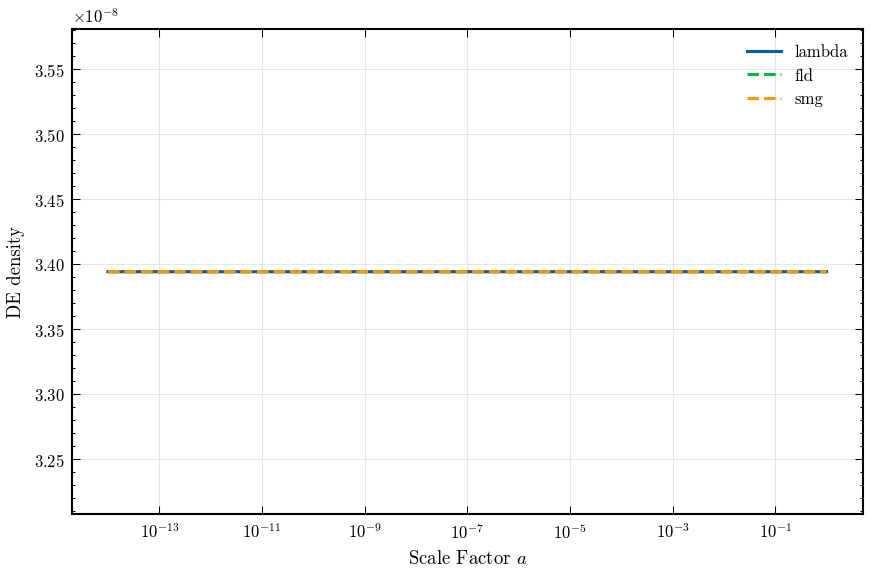

In [ ]:
fig, ax = plt.subplots()

ax.semilogx(lcdm_bk_a, lcdm_bk['(.)rho_lambda'], label='lambda')
ax.semilogx(w0wac_bk_a, w0wac_bk['(.)rho_fld'], '--',label='fld')
ax.semilogx(w0wam_bk_a, w0wam_bk['(.)rho_smg'], '--',label='smg')

# ax.invert_xaxis()
ax.set_ylabel('DE density')
ax.set_xlabel('Scale Factor $a$')
ax.legend()


KeyError: 'delta_smg'

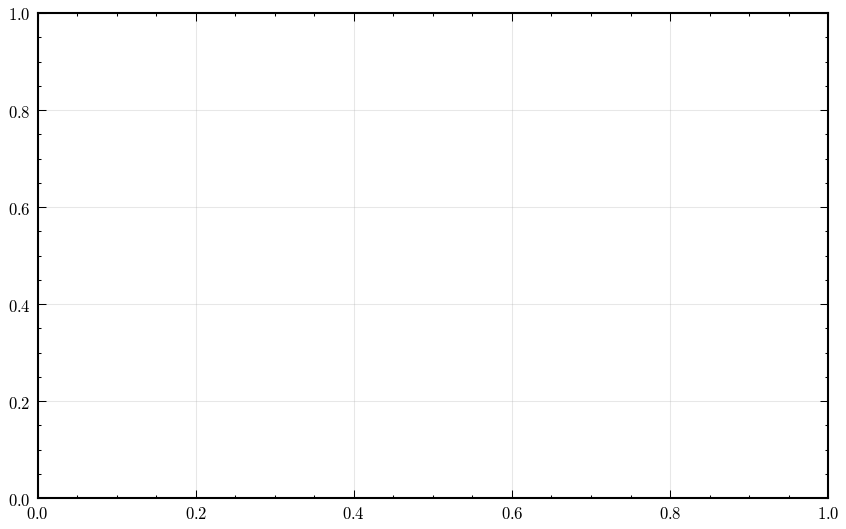

In [ ]:
fig, ax = plt.subplots()

ax.semilogx(w0wam_pt[0]['a'], w0wam_pt[0]['delta_smg'])
ax.semilogx(w0wam_pt[0]['a'], w0wam_pt[0]['theta_smg'], '--')

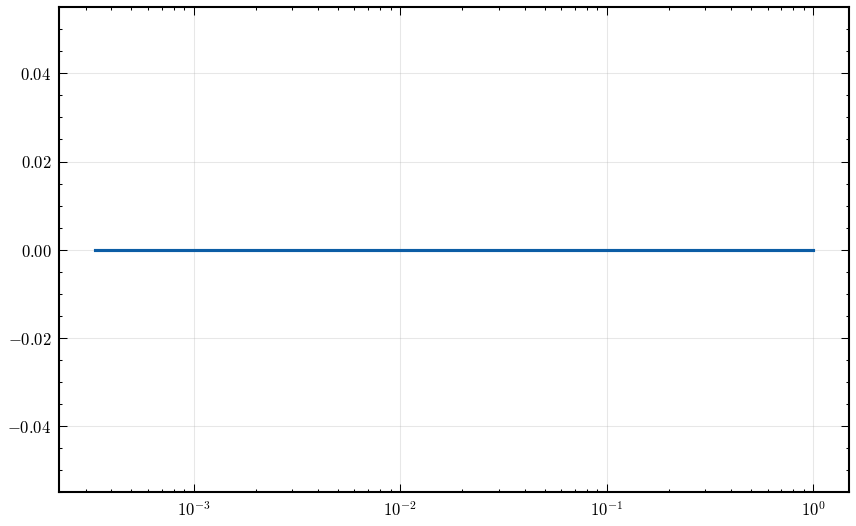

In [ ]:
fig, ax = plt.subplots()

ax.semilogx(w0wac_pt[0]['a'], w0wac_pt[0]['theta_fld'])